In [71]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [72]:
import matplotlib.pyplot as plt

In [ ]:
#front
side_fan = (113,280)


In [109]:
df = {}
parent_folder = "dataset/front/forward/wind_speed_1/head_wind/"
def calculate_global():
    for i in range(1,6):
        csv_path = f"{parent_folder}drone{i}.csv"
        df[csv_path] = pd.read_csv(csv_path)
        
        pad_coor = {}
        # front
        pad_coor['1,1'] = (0,200)
        pad_coor['1,5'] = (200,200)
        pad_coor['2,2'] = (0,150)
        pad_coor['2,6'] = (200,150)
        pad_coor['3,3'] = (0,100)
        pad_coor['3,7'] = (200,100)
        pad_coor['4,4'] = (0,50)
        pad_coor['4,8'] = (200,50)
        pad_coor['5,1'] = (0,0)
        pad_coor['5,5'] = (200,0)
        
        # declare
        df[csv_path]['global_x'] = 1
        df[csv_path]['global_y'] = 1
        
        # calculate global and plot
        for row_no in range(len(df[csv_path])):
            pad_id = df[csv_path]['mid'][row_no]
            rel_x = df[csv_path]['x'][row_no]
            rel_y = df[csv_path]['y'][row_no]
            drone_number = df[csv_path]['address'][row_no][-1]
            if pad_id > 0:
                pad_coordinate = pad_coor[f"{drone_number},{pad_id}"]
                global_x = pad_coordinate[0] + rel_x
                global_y = pad_coordinate[1] + rel_y
            else:
                global_x = None
                global_y = None
        
            df[csv_path].at[row_no,"global_x"] = global_x
            df[csv_path].at[row_no,"global_y"] = global_y
        #print(df[csv_path]["global_y"])

In [110]:

def plot_attribute(x_attr, y_attr):    
    for i in range(1,6):
        csv_path = f"{parent_folder}drone{i}.csv" 
        plt.plot(df[csv_path][x_attr] if x_attr != "global_x" and x_attr != "global_y" else df[csv_path][x_attr][df[csv_path]['mid']>0],
            df[csv_path][y_attr] if y_attr != "global_x" and y_attr != "global_y" else df[csv_path][y_attr][df[csv_path]['mid']>0])
        plt.xlabel(x_attr)
        plt.ylabel(y_attr)

    plt.show()    

In [111]:
calculate_global()

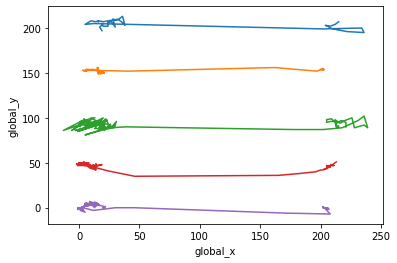

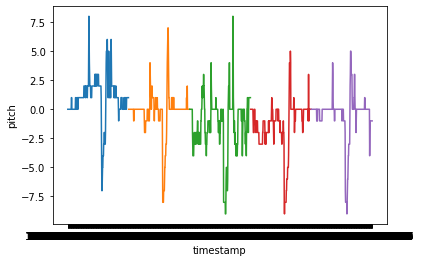

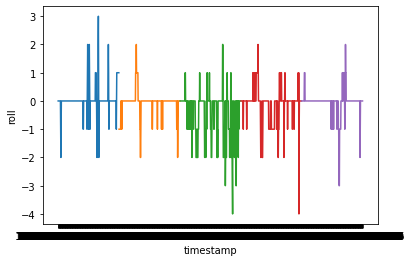

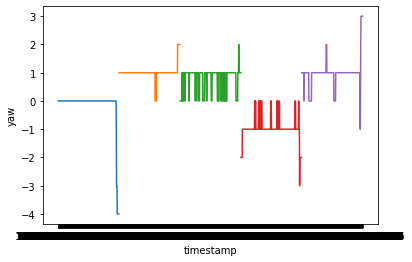

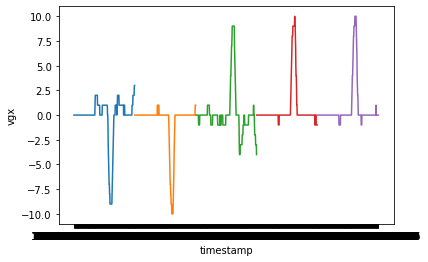

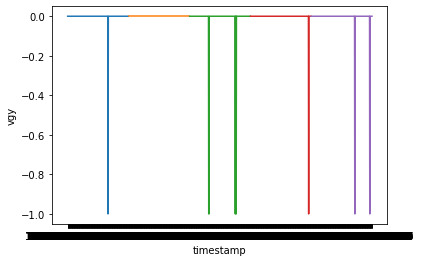

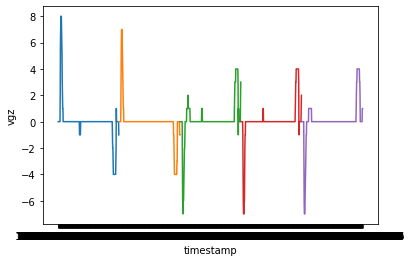

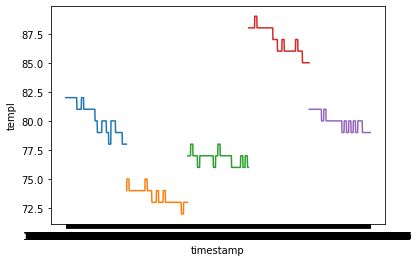

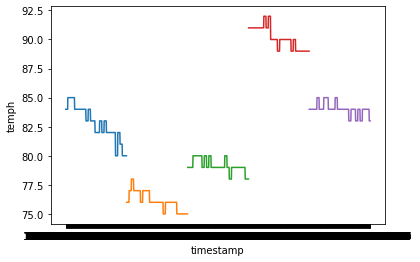

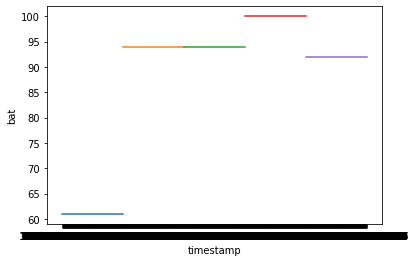

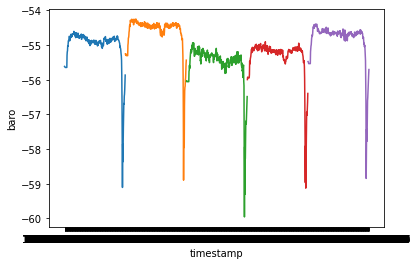

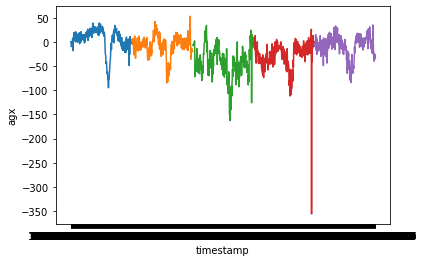

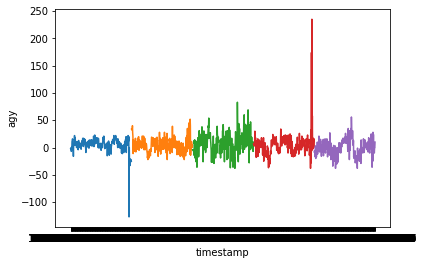

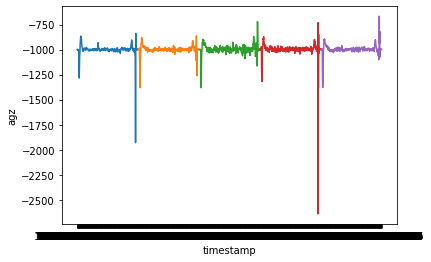

In [112]:
# mid,x,y,z,mpry,pitch,roll,yaw,vgx,vgy,vgz,templ,temph,tof,h,bat,baro,time,agx,agy,agz,timestamp,address
plot_attribute('global_x','global_y')
# plot_attribute('timestamp','mpry')
plot_attribute('timestamp','pitch')
plot_attribute('timestamp','roll')
plot_attribute('timestamp','yaw')
plot_attribute('timestamp','vgx')
plot_attribute('timestamp','vgy')
plot_attribute('timestamp','vgz')
plot_attribute('timestamp','templ')
plot_attribute('timestamp','temph')
# plot_attribute('timestamp','tof')
# plot_attribute('timestamp','h')
plot_attribute('timestamp','bat')
plot_attribute('timestamp','baro')
# plot_attribute('timestamp','time')
plot_attribute('timestamp','agx')
plot_attribute('timestamp','agy')
plot_attribute('timestamp','agz')


In [100]:
# for key in df:
print(df)

{'dataset/front/forward/wind_speed_0/none/drone1.csv':      Unnamed: 0  mid    x    y    z       mpry  pitch  roll  yaw  vgx  ...  \
0             0   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
1             5   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
2            11   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
3            16   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
4            21   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
5            27   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
6            32   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
7            37   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
8            42   -2 -200 -200 -200      0,0,0     -1     0    0    0  ...   
9            47   -2 -200 -200 -200      0,0,0      0     0    0    0  ...   
10           52   -2 -200 -200 -200      0,0,0      1     0    0    0  ...   
11       

In [102]:
for path in df.keys():
    new_path = path.split('.')[0] + "_with_global.csv"
    df[path].to_csv(new_path,index=False)